# **RPC**

- Client to Server 패턴
  - Server를 켬
  - Client는 Server에 데이터 혹은 행동을 요청
  - Server는 요청 받은 내용에 대한 응답을 반환
  - Client는 응답 값으로 자신의 요청 결과를 알 수 있음
- 이를 구현하기 위해서 HTTP와 Socket을 많이 씀

**RPC가 필요한 이유**

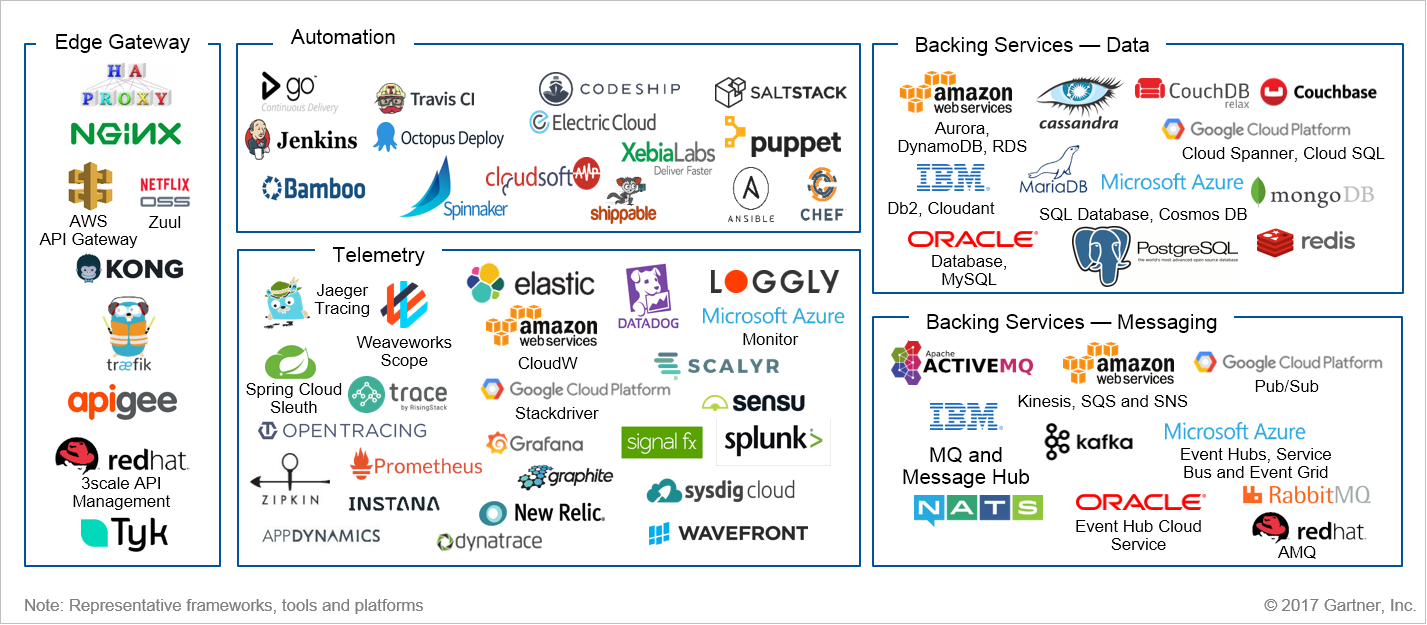

- MSA(Micro Service Architecture) 구조로 서비스를 만들다보면, 다양한 언어와 프레임워크로 개발되는 경우가 잦음
 - Polyglot 한 구조에서는 프로토콜을 맞춰서 통신해야 하는 비용이 발생.
 - RPC를 이용하여 언어에 구애받지 않고, 원격에 있는 프로시저를 호출하여 조금 더 비즈니스 로직에 집중하는 개발을 할 수 있음.

**RPC의 개념**

- 원격 프로시저 호출(영어: remote procedure call, 리모트 프로시저 콜, RPC)은 별도의 원격 제어를 위한 코딩 없이 다른 주소 공간에서 함수나 프로시저를 실행할 수 있게하는 프로세스 간 통신 기술.
- 원격 프로시저 호출을 이용하면 프로그래머는 함수가 실행 프로그램에 로컬 위치에 있든 원격 위치에 있든 동일한 코드를 이용할 수 있음.

- RPC(Remote Procedure Call)란 프로세스간 통신을 위해 사용하는 IPC(Inter Process Communication) 방법의 한 종류
- 원격지의 프로세스에 접근하여 프로시저 또는 함수를 호출하여 사용.
  - 원격지의 프로시저를 호출하는 것.

- 일반적으로는 프로세스는 자신의 주소공간 안에 존재하는 함수만 호출하여 실행 가능.
- RPC를 이용하면 다른 주소공간에서 동작하는 프로세스의 함수를 실행할 수 있게 된다.
- 분산 컴퓨팅 환경에서 프로세스 간 상호 통신 및 컴퓨팅 자원의 효율적인 사용을 위해서 발전된 기술.

- RPC는 분산 컴퓨팅과 client-server를 베이스로 한 앱을 위한 기술.
- RPC는 일반적인 로컬 프로시저 호출을 확장하는 것을 기반으로 한다.
- 호출된 프로시저의 필요가 호출하는 프로시저 처럼 같은 주소 공간에 존재하지 않는다.
- 두 프로세스들이 같은 시스템에 있거나 다른 시스템에 존재하며 네트워크가 그들을 연결하는 형태로 존재.

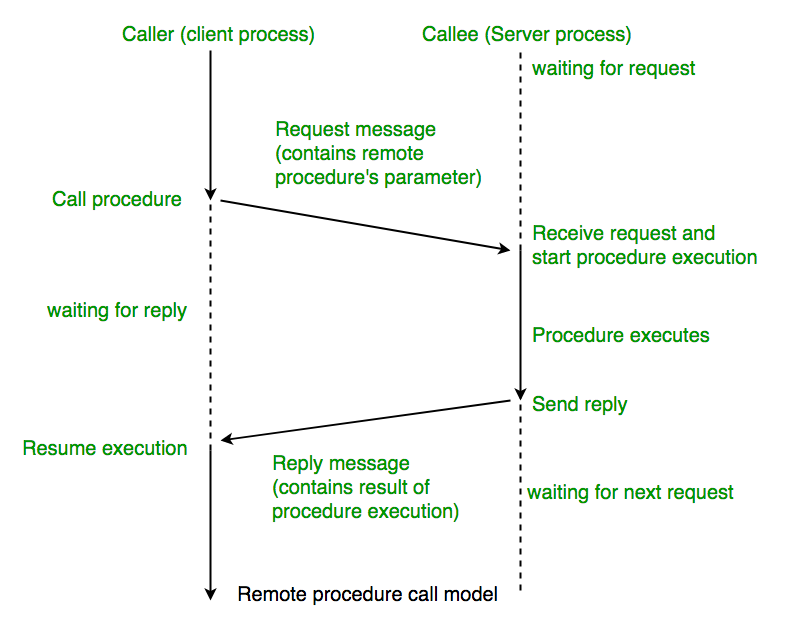

> 참고 : RPC 는 특히 제어 흐름이 호출자와 수신자 간에 교대로 이루어지는 클라이언트-서버 (이를테면 쿼리-응답) 상호작용에 적합하다. 개념적으로, 클라이언트와 서버는 동시에 실행하지 않는다. 대신, 실행 스레드가 호출자로부터 수신자에게 점프했다가 다시 돌아온다.



**프로시저와 함수의 차이?**

- RPC를 이야기하며 프로시저란 말이 많이 나오는데, 함수는 인풋에 대비한 아웃풋의 발생을 목적으로 한다.
- 프로시저는 결과 값에 집중하기 보단 '명령 단위가 수행하는 절차'를 목적으로 한다.

**RPC의 궁극적인 목표는?**

- 클라이언트-서버 간의 커뮤니케이션에 필요한 상세정보는 최대한 감춘다.
- 클라이언트는 일반 메소드를 호출하는 것처럼 원격지의 프로지서를 호출할 수 있다.
- 서버도 마찬가지로 일반 메소드를 다루는 것처럼 원격 메소드를 다룰 수 있다.

**RPC의 동작 방식**

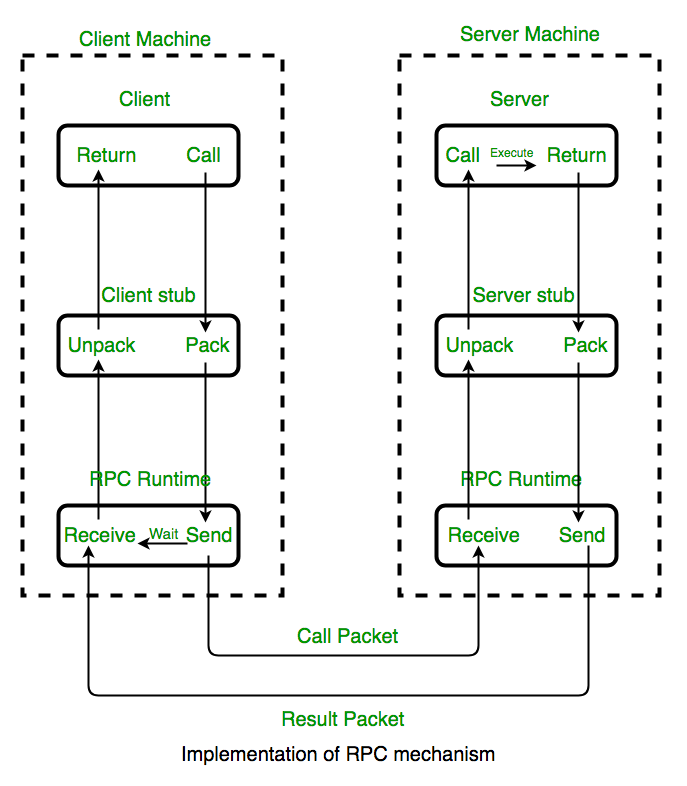

- 클라이언트가 일반적인 방식으로 파라미터를 넘겨 client stub procedure를 호출.
- client stub은 클라이언트를 소유한 주소의 공간 내에 거주.
- client stub이 파라미터들을 메세지로 모은다.
- 여기서 모은다는 것에 파라미터의 표현을 표준 포맷으로 변경하고 각 파라미터를 복사해서 메세지로 넣는 것도 포함.
- client stub은 원격 서버 머신으로 메세지를 보내는 계층인 transport layer로 메세지를 보낸다.
- 서버에서, transport layer는 메세지를 server stub으로 보낸다.
- server stub은 또 파라미터들을 모아주고 일반적인 프로시저 호출 메커니즘을 사용하여 요구된 서버 루틴을 호출한다.
- 서버 프로시저가 완료될 때, 서버 프로시저는 server stub으로 반환된다. (이를테면 일반적인 프로시저 호출 반환값을 통해), server stub은 결과 값들을 모아서 메세지에 넣고, transport layer에 메세지를 보낸다.
- transport layer는 결과 메세지를 다시 client transport layer로 보내고 client transport layer는 그 결과를 또 client stub에게 전달한다.
- client stub은 반환 파라미터들과 실행 결과값을 다시 해체한다.

**IDL을 이용한 동작방식 설명 2**

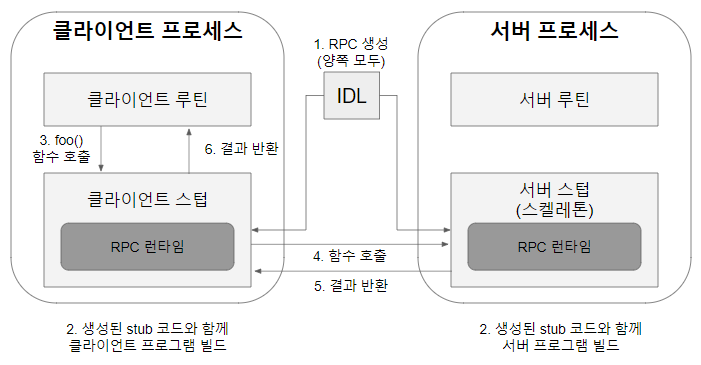

- IDL(Interface Definition Language)을 사용하여 서버의 호출 규약을 정의한다.
- 함수명, 인자, 반환값에 대한 데이터 형이 저장된 IDL 파일을 rpcgen 컴파일러를 이용하여 stub 코드를 자동으로 생성한다.
- Stub은 원시소스코드 (C코드 등)의 형태로 만들어지므로 클라이언트, 서버 프로그램에 포함하여 빌드한다.
- 클라이언트 프로그램 입장에서 자신의 프로세스 주소공간의 함수를 호출하는 것처럼 동일하게 stub에 정의된 함수를 호출할 수 있게 된다.
- stub 코드는 데이터형을 XDR(External Data Representation) 형식으로 변환하여 RPC 호출을 실행한다.
- 4.1. XDR 변환 이유는 기본 데이터 타입(정수형, 부동소수점 등)에 대한 메모리 저장방식(리틀엔디안, 빅엔디안)이 CPU 아키텍쳐별로 다르며, 네트워크 전송과정에서 바이트 전송 순서를 보장하기 위함이다.
- 서버는 수신된 함수/프로시저 호출에 대한 처리 완료 후, 결과값을 XDR 변환하여 반환한다.
- 최종적으로 클라이언트 프로그램은 서버의 결과값을 반환받는다.

**RPC 이슈들**

- RPC 런타임: RPC 런타임 시스템은 RPC 메커니즘을 기반으로한 네트워크 통신을 다루는 서비스의 집합과 루틴의 라이브러리이다. RPC 호출 과정에서, 클라이언트 사이드와 서버 사이드 런타임 시스템의 코드는 바인딩을 다루고, 적절한 프로토콜 위에서 통신을 구성하고 클라이언트와 서버 사이에서 호출 데이터를 넘기고 통신 에러를 다룬다.

- 스텁(Stub): 스텁의 함수는 프로그래머가 쓴 어플리케이션 코드에 투명성을 제공하기 위함이다.

  클라이언트 사이드에서는 스텁이 클라이언트의 로컬 프로시저 호출과 런타임 시스템을 다루고, 데이터를 모으고 해체하고, RPC 런타임 프로토콜을 호출하고 만일 요청됐다면, 몇가지 바인딩 스텝을 수행한다.

  서버 사이드에서는 스텁이 런타임 시스템과 서버에 의해 실행된 로컬 매니저 프로시저 사이에 비슷한 인터페이스를 제공.

- 바인딩(Binding): 클라이언트는 누구를 호출해야 할지 어떻게 알고 서비스가 위치한 곳을 어떻게 알까?
가장 유연한 해결법은 동적 바인딩을 사용하고 RPC가 처음 만들어졌을 때 런타임에 서버를 찾는 것이다. 클라이언트 스텁이 처음 호출됐을 때, 서버가 있는 곳에 transport address를 결정하기 위해 네임 서버에 접근한다.



**RPC의 대표적인 구현체**
- ProtocolBuffer by Google
- Thrift by Facebook
- Finalge by Twitter

**RPC의 장점**

- 고유 프로세스 개발 집중 가능 (하부 네트워크 프로토콜에 신경쓰지 않아도 되기 때문)
- 프로세스간 통신 기능을 비교적 쉽게 구현하고 정교한 제어가 가능

**RPC의 단점**
- 호출 실행과 반환 시간이 보장되지 않음 (네트워크 구간을 통하여 RPC 통신을 하는 경우, 네트워크가 끊겼을 때 치명적 문제 발생)
- 보안이 보장되지 않음
- 현재 통신방법의 트렌드
- 기존에는 프로세스간 통신을 위해 소켓통신, RPC 같은 방식이나 RPC를 활용한 CORBA, RMI 같은 방식이 많이 사용.

- 현재는 웹기술이 발달해서 SOAP, REST 등과 같은 방식이 대세를 이루고 있다. 또, 2015년에는 구글에서 RPC와 웹기술을 혼합한 gRPC를 처음 발표하기도 했다.

- RPC 모델은 분산 컴퓨팅 환경에서 많이 사용됐으며, 현재는 MSA에서 마이크로 서비스 간에 많이 사용한다. 서로 다른 환경이지만 서비스간의 프로시저 호출을 가능하게 해줌에 따라 언어에 구애받지 않고 환경에 대한 확장이 가능하며, 좀 더 비즈니스 로직에 집중하여 생산성을 증가시킬 수 있다.